# ***DSCI 100 Final Report (002 Group 12)***
by **Kenneth Ahn, Alex Ronczewski, Ryan Zhang, Natalie Viegas**


In this report, a dataset based on UBC’s minecraft server “Plaicraft” was created and distributed to DSCI 100 students to answer questions regarding the results of the dataset. The broad question we decided to answer was "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?". Specifying our broad question further, we decided on our report question to be "Can experience level predict whether a player subscribes to a game-related newsletter in the "Players" dataset?". Delving deeper into the “Players” dataset, there are 7 variables, 196 observations and a multitude of columns describing different aspects of the data acquired from “Plaicraft”. These variables include, “Experience”, “Subscribe”, hashedEmail”,  “played_hours”, “name”, “gender” and “Age”. 


Broad Question: **What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

Our Research Question: **Can experience level and hours played predict whether a player subscribes to a game-related newsletter in the "Players" dataset?"**

## **Methods & Results**


In [1]:
#Load the necessary libraries and set the matrix max rows to 6. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Load the dataset into R using the raw file from Github

players <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### Table 1: Variable Descriptions for the Players Dataset

This dataset has 196 observations and 7 Variables. 

| Variable Name | Variable Type | Description                                                         | 
|---------------|---------------|---------------------------------------------------------------------|
|experience     |character      |Player's experience level (Beginner, Amateur, Regular, Veteran, Pro) |
|subscribe      | logical       | Whether the player has subscribed to the newsletter (TRUE or FALSE) |
|hashedEmail    | character     |   Player's identifier                                               |
|played_hours   |  double       | Player's total number of hours played                               |
|name           | character     |   Player's name                                                     |
|gender         |  character    |   Player's gender (Male or Female)                                  |
|Age            |    double     |    Player's age                                                     |

In [3]:
#More specific summary stats for our question, we can use these if we want not necessary. 

#Distribution of experience levels of players
experience_summary <- players |> 
  count(experience, name = "count")
#experience_summary

experience_plot <- ggplot(players, aes(x = experience)) +
  geom_bar(fill = "lightblue") +
  labs(
    title = "Player Experience Levels",
    x = "Experience Level",
    y = "Count") 

#experience_plot

#Distribution of subscriptions for our question levels of players

subscription_summary <- players |> 
  summarize(subscribed_players = sum(subscribe, na.rm = TRUE),
    not_subscribed_players = sum(!subscribe, na.rm = TRUE))

#subscription_summary


### **Tidying the data**

Possible issues

`For players.csv`
- Remove NA data from age.
- Remove NA from experiece if it does exist
- Make sure that the data is in a tidy format
- Convert Gender and Experience to a factor variable
- Change experience to a qualitative variable from 1-5

In [4]:
#Cleaning for players.csv
players_clean <- players |> 
  filter(!is.na(Age)) |>  
  mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5) |> as.factor(),
    subscribe = factor(subscribe, levels = c(TRUE, FALSE))) |> 
  filter(!is.na(experience))  
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
5,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
4,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
2,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
2,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


After cleaning the data we can continue with the next steps of our data analysis. 

### **Main Analysis Section:**

Research question: "Can experience level and hours played predict whether a player subscribes to a game-related newsletter in the "Players" dataset?" We have a binary classification based on a predictive variable, for this analysis we will use the K-Nearest Neighbours Technique. We choose this as opposed to other techniques from this course like linear regressions because in the dataset we have 194 observations which is quite small and we are predicting a binary outcome (yes/no) as opposed to something continious like increase in price. First let's look at the relationship between experience levels and amount subscribed in a bar plot. 

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


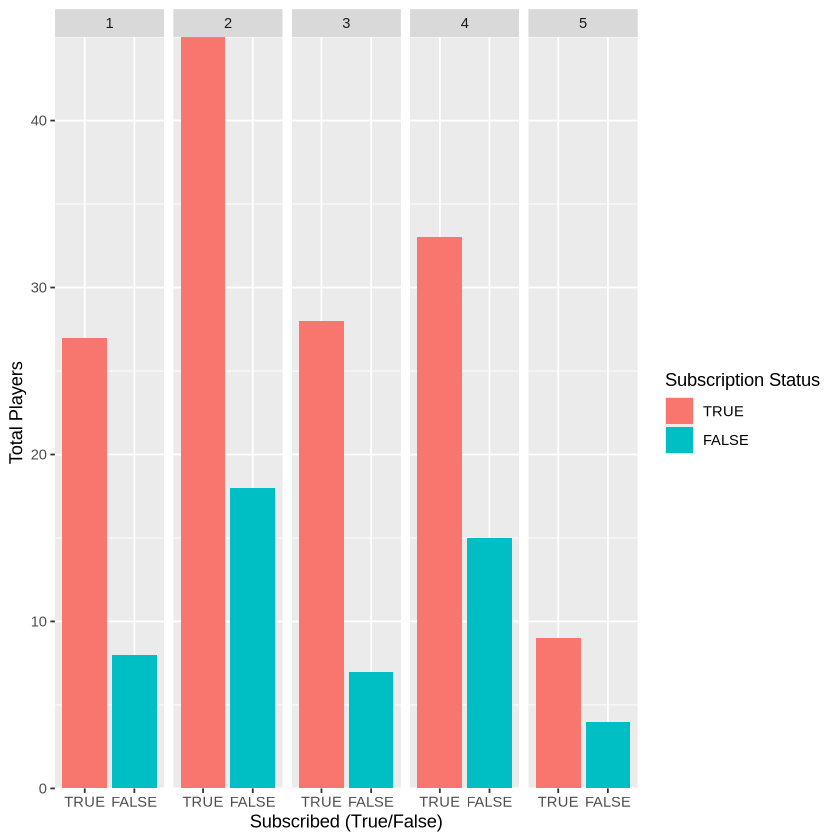

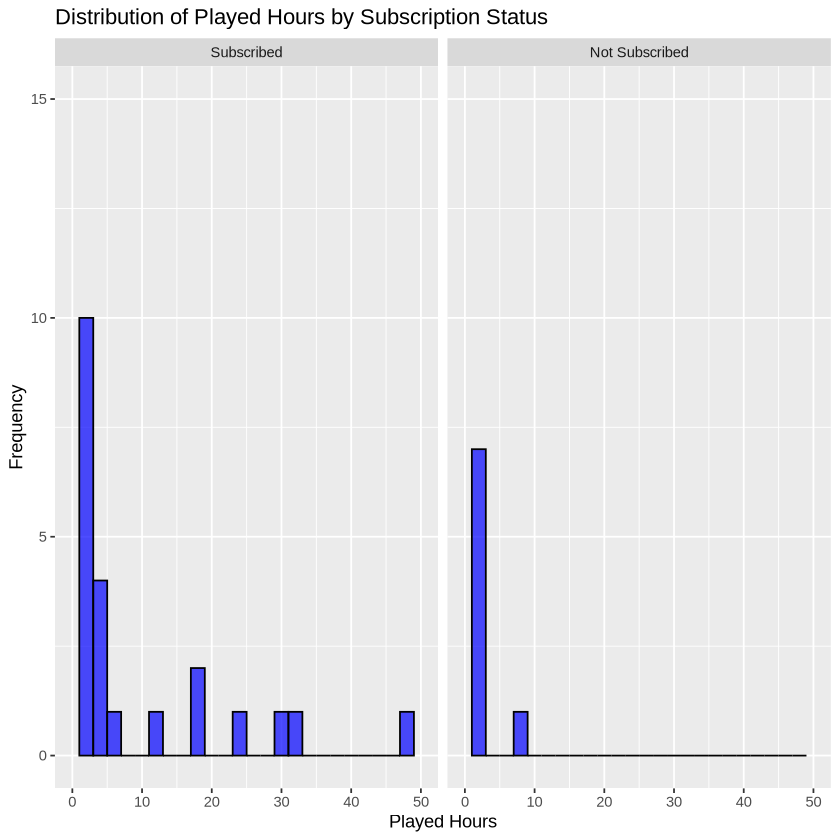

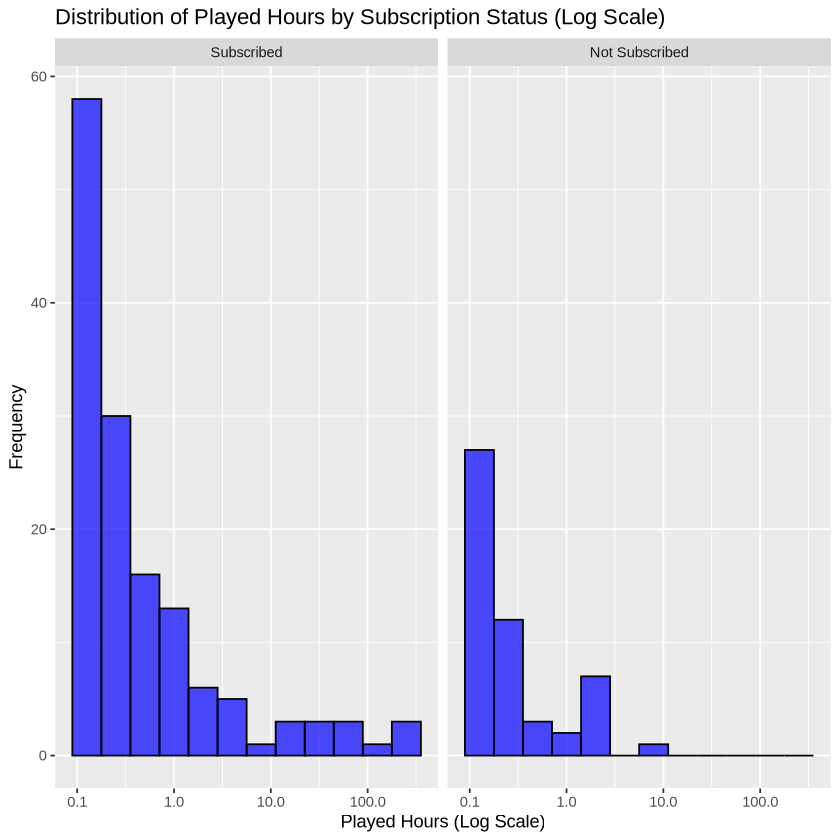

In [6]:
#Experience level and subscription stats
experience_subscribed_amount <- players_clean |>
    group_by(experience, subscribe) |>
    summarise(total = n())

experience_subscribed_plot <- experience_subscribed_amount |>
    ggplot(aes(x = subscribe, y = total, fill = subscribe)) +
    geom_bar(stat = "identity") +
    facet_grid(~experience) +  
    xlab("Subscribed (True/False)") +
    ylab("Total Players") +
    labs(fill = "Subscription Status") +
    scale_y_continuous(expand = c(0, 0)) +
    theme(text = element_text(size = 11))
experience_subscribed_plot

#Hours played and subscription stats visualizations

# Faceted histograms by subscription status, limited to 50 hours
hours_plot <- ggplot(players_clean, aes(x = played_hours)) +
  geom_histogram(binwidth = 2, fill = "blue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe, labeller = labeller(subscribe = c("TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))) +
  labs(
    title = "Distribution of Played Hours by Subscription Status",
    x = "Played Hours",
    y = "Frequency") +
  xlim(0, 50) +
  ylim(0, 15) 

hours_plot

hours_plot_2 <- ggplot(players_clean, aes(x = played_hours + 0.1)) +
  geom_histogram(binwidth = 0.3, fill = "blue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe, 
             labeller = labeller(subscribe = c("TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))) +
  labs(
    title = "Distribution of Played Hours by Subscription Status (Log Scale)",
    x = "Played Hours (Log Scale)",
    y = "Frequency"
  ) +
  scale_x_log10()
hours_plot_2

As for the main analysis using K-NN as our method.

**Analysis**

Note: Can delete all of this for the final submission and just keep the tuning section if we want, this is more to show where the info came from. 

First lets look at the regression with n = 3 as that was the inclass standard and see the accuracy, precision and recall to answer if we can predict subscription with Played_hours and experience level. 

In [11]:
#Working New question which KNN can actually be used on Played_hours and experience level
set.seed(12)
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
2,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
2,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
4,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,TRUE,8c9d043ebb3689e679a37bfed30ea96272bcd14689ed2d9fcd68a4ae0c1663bc,0,Lina,Female,17
2,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20
2,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


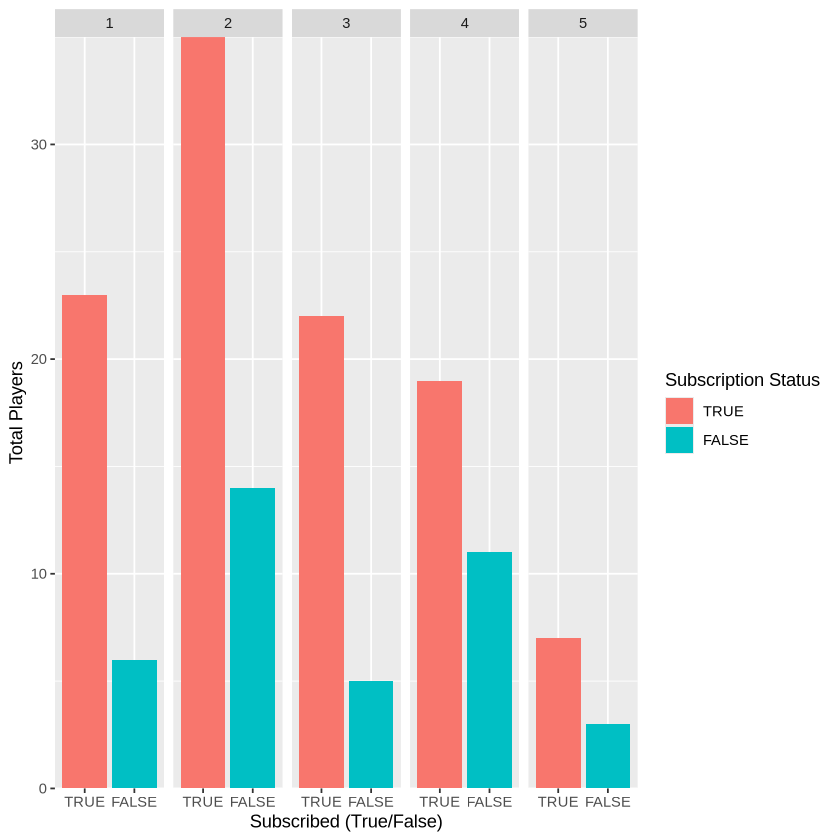

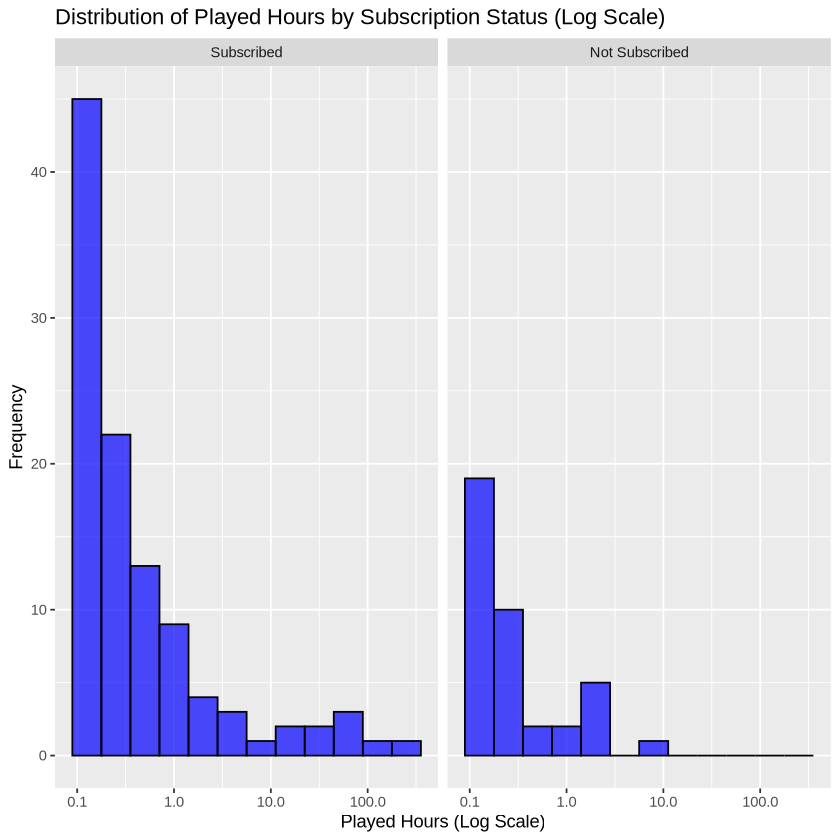

In [12]:
#Visualize training set
set.seed(12)
players_train

experience_subscribed_amount_2 <- players_train |>
    group_by(experience, subscribe) |>
    summarise(total = n())

experience_subscribed_plot <- experience_subscribed_amount_2 |>
    ggplot(aes(x = subscribe, y = total, fill = subscribe)) +
    geom_bar(stat = "identity") +
    facet_grid(~experience) +  
    xlab("Subscribed (True/False)") +
    ylab("Total Players") +
    labs(fill = "Subscription Status") +
    scale_y_continuous(expand = c(0, 0)) +
    theme(text = element_text(size = 11))
experience_subscribed_plot


played_hours_training <- ggplot(players_train, aes(x = played_hours + 0.1)) +
  geom_histogram(binwidth = 0.3, fill = "blue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe, 
             labeller = labeller(subscribe = c("TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))) +
  labs(
    title = "Distribution of Played Hours by Subscription Status (Log Scale)",
    x = "Played Hours (Log Scale)",
    y = "Frequency"
  ) +
  scale_x_log10()
played_hours_training

We can see from visualizations that the training dataset is reflective of our regular dataset. (ADD MORE HERE IF WE WANT)

In [13]:
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_train) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)
#players_test_predictions

In [14]:
#First, we will examine accuracy
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4489796


In [15]:
#Now precision
players_test_predictions |> pull(subscribe) |> levels()

players_test_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first") #Here first is predicting 'true' ie if the person is subscribed

[1] "TRUE"  "FALSE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8


In [16]:
#Finally recall
players_test_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3333333


In [ ]:
#Make a matrix to show the predictions
confusion_matrix <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

### **Results**

Accuracy is 0.4489796, Precision is 0.8, Recall is 0.3333333

So not great let's improve this with tuning the classifer with cross validation 

In [17]:
#Improve this accuracy with a different K
set.seed(12)

# Split data into training/test sets
players_split <- initial_split(players_train, prop = 0.75, strata = subscribe)
players_subtrain <- training(players_split)
players_validation <- testing(players_split)

# Create preprocessing recipe
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_subtrain) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

# Specify KNN model with tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#fit the knn model (reusing old model)
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, players_validation) |>
  bind_cols(players_validation)

# Find Accuracy
accuracy <- validation_predicted |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

accuracy

Warning message:
“tune samples were requested but there were 108 rows in the data. 103 will be used.”


[1] 0.7297297

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

#accuracies

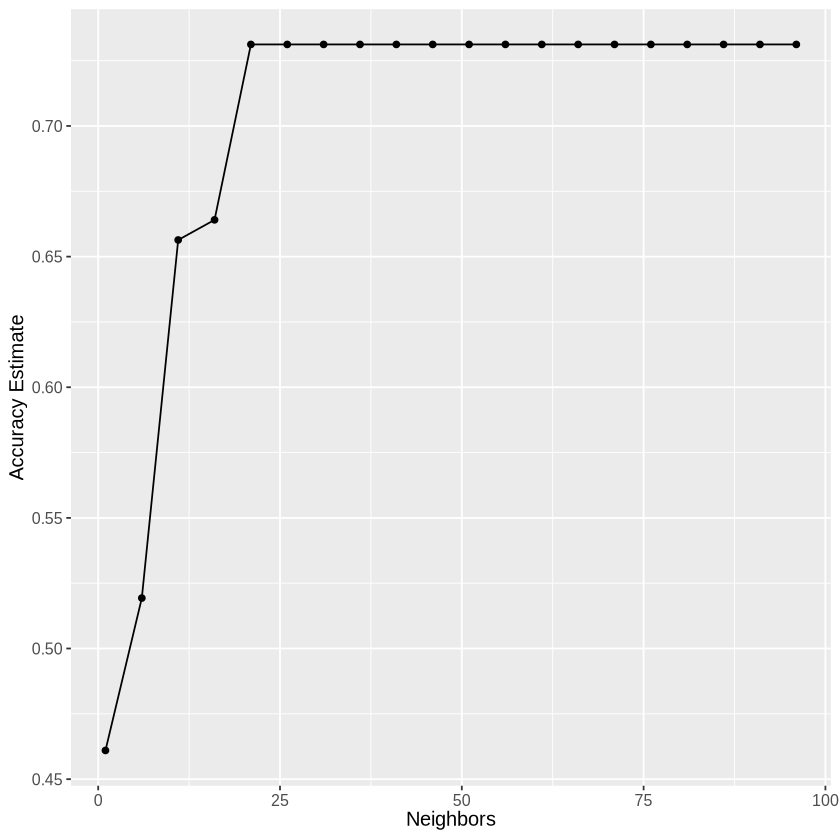

In [20]:
#Visualization of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [21]:
#Find our best K
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

In [22]:
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_train) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

# Specify KNN model with tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> # k = 31
  set_engine("kknn") |>
  set_mode("classification")

#fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

In [23]:
#Find accuracy
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.755102


In [24]:
#Find prediction 
players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


In [25]:
#Find recall 
players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


In [26]:
confusion_matrix <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

          Truth
Prediction TRUE FALSE
     TRUE    36    12
     FALSE    0     1

**Second Results**

We have improved our predictive power by a lot. Before Accuracy is 0.4489796, Precision was 0.8, Recall was 0.3333333 and now it is Accuracy at 0.755102, Precision at 0.75, and Recall at 1. 

Reasons for this matrix etc: 
- Model that shows strong bias toward predicting the TRUE class.
- This confusion matrix demonstrates that the model is predicting almost exclusively the TRUE class (48 TRUE predictions vs. only 1 FALSE prediction). While achieving perfect recall (1.0) might seem positive, it comes at the expense of poor discrimination, as evidenced by the 12 false positives and only 1 true negative.
- The model's behavior represents a classic case of class imbalance bias. The classifier has essentially "learned" that predicting TRUE almost all the time leads to acceptable accuracy due to the underlying class distribution (36 TRUE instances vs. 13 FALSE instances).

Reasons for this bias
- The fundamental issue is the imbalanced class distribution in the training data. With approximately 73% TRUE instances and 27% FALSE instances, the model is naturally biased toward the majority class. (for instance in class we had more of a 50/50 dataset.

Potential solutions we found
- Threshold Adjustment
- Undersampling the Majority Class (Might not be good but possible)
- Cost-Sensitive Learning (This penalizes the model more heavily for misclassifying FALSE instances)

Conclusion
The current model exhibits a strong bias toward predicting the TRUE class, severely limiting its ability to identify the FALSE class. This issue stems primarily from class imbalance in the training data and the use of an inappropriate default threshold.